<a href="https://colab.research.google.com/github/Tj-dev-py/Machine-Learning-Projects/blob/main/Housing_Prices_Ames%2C_Iowa_Project_(version_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install --upgrade scikit-learn 


In [ ]:
# Loading neccesary packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from scipy import stats
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250
sns.set_style('darkgrid')

# Meeting the data

In [ ]:
train = pd.read_csv('/content/housing_ames_train.csv')
test = pd.read_csv('/content/housing_ames_test.csv')

In [ ]:
from IPython.display import display

display(train.shape, test.shape)

(1460, 81)

(1459, 80)

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

Id column looks useless we can safely drop it from both. I'm going to save our target (SalePrice) on different variable so we can use it in future.

In [ ]:
# Dropping unnecessary Id column.

train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

In [ ]:
# Backing up target variables and dropping them from train data.

y = train.SalePrice
train_features = train.drop('SalePrice', axis=1)
test_features = test.copy()

#Analysis Time!
Ok the short inspection at the beginning give us some hints how should we move from here. I'm going to play with the data we have while analysing the data at the same time. With this way I hope we can get the data in better shape while digging deeper into it.

We're going to start with basic correlation table here. I dropped the top part since it's just mirror of the other part below. With this table we can understand some linear relations between different features.

###Observations:
* There's strong relation between overall quality of the houses and their sale prices.
* Again above grade living area seems strong indicator for sale price.
* Garage features, number of baths and rooms, how old the building is etc. also having effect on the price on various levels too.
* There are some obvious relations we gonna pass like total square feet affecting how many rooms there are or how many cars can fit into a garage vs. garage area etc.
* Overall condition of the house seems less important on the pricing, it's interesting and worth digging.


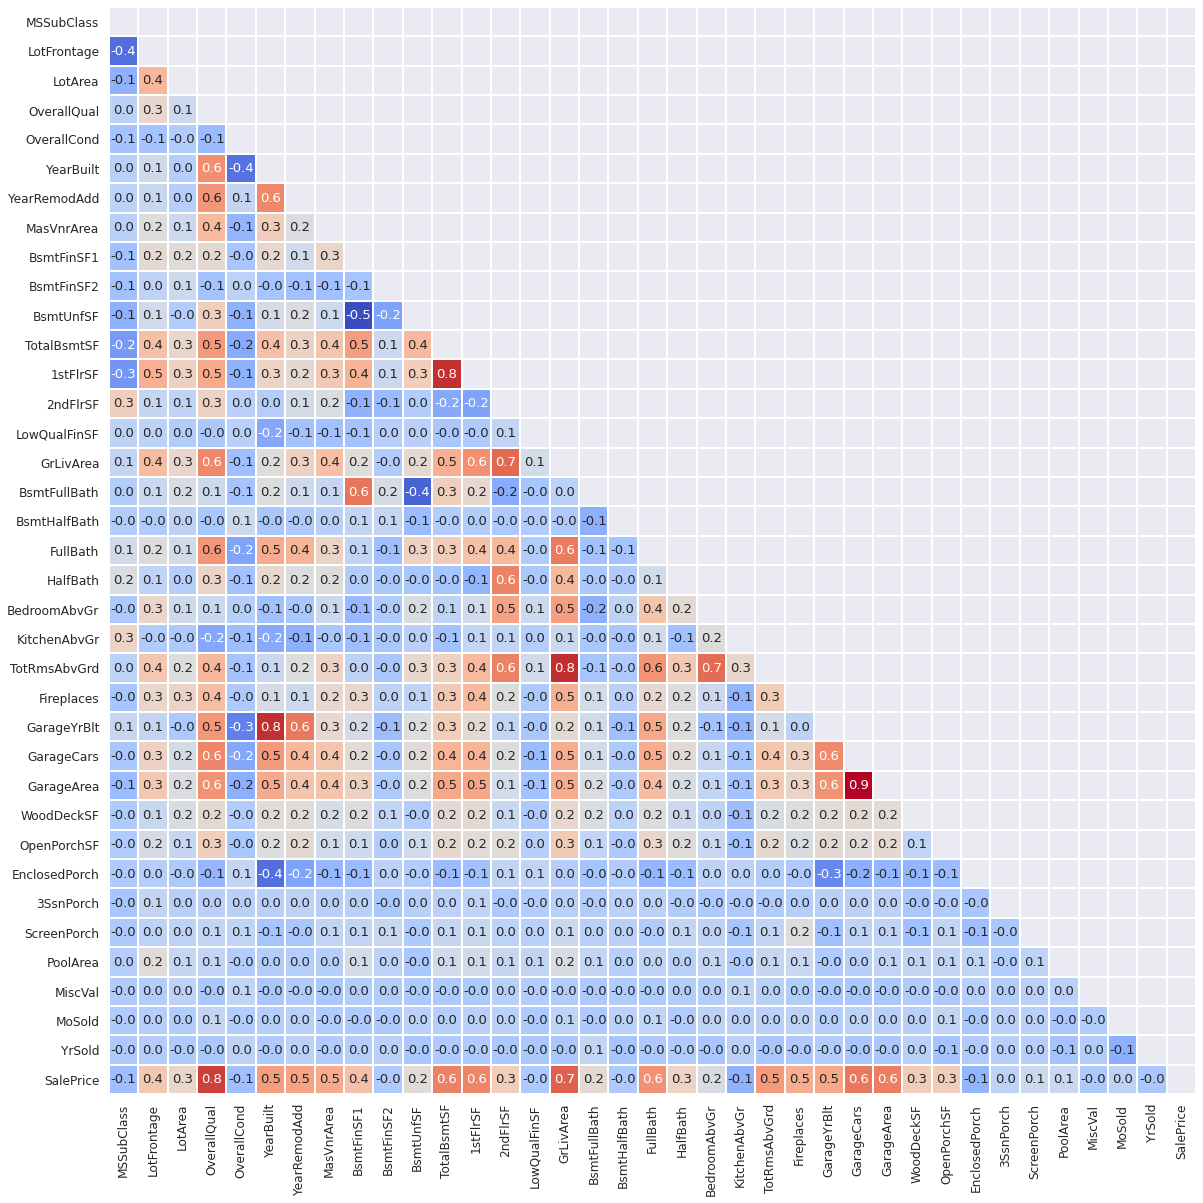

In [ ]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_train, 
            annot=True,
            cmap='coolwarm',
            fmt='.1f',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

I'm going to merge the datasets here before we start editing it so we don't have to do these operations twice. Let's call it features since it has features only. So our data has 2919 observations and 79 features to begin with...

In [ ]:
# Merging train test features for engineering.

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)

(2919, 79)


In [ ]:
features.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

## Missing Data
Alright, first of all we need detect missing values, then we need to get rid of them for the next steps of our work. So let's list our missing values and visualize them:

In [ ]:
def missing_percentage(df):

  """A function for returning missing ratios"""

  total = df.isnull().sum().sort_values(ascending=False)[
    df.isnull().sum().sort_values(ascending=False) != 0
  ]

  percent = (df.isnull().sum().sort_values(ascending=False) / len(df) * 100)[
    (df.isnull().sum().sort_values(ascending=False) / len(df) * 100) != 0
  ]

  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

That's quite a lot! No need to panic though we got this. If you look at the data description given to us we can see that most of these missing data actually not missing, it's just means house doesn't have that specific feature, we can fix that easily...

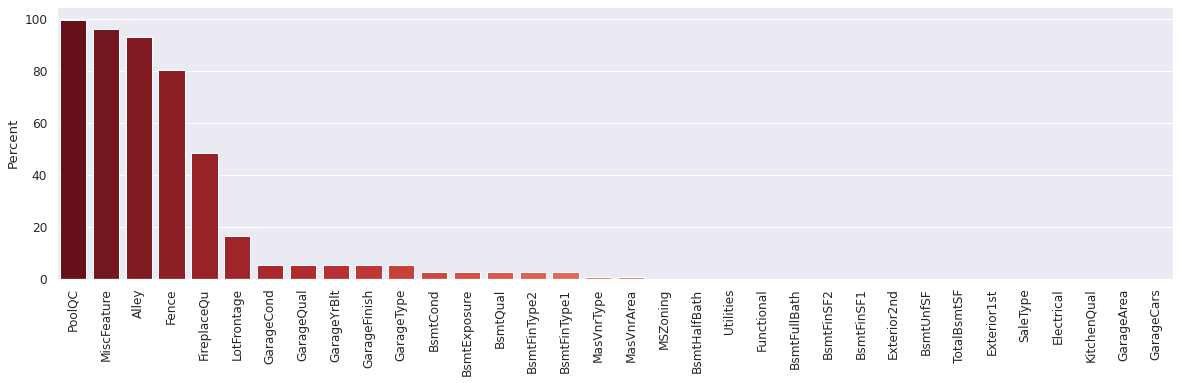

In [ ]:
# Checking 'NaN' values.

missing = missing_percentage(features)
plt.figure(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

##Ok this is how we gonna fix most of the missing data:
First we fill the NaN's in the columns where they mean 'None' so we gonna replace them with that,
Then we fill numerical columns where missing values indicating there is no parent feature to measure, so we replace them with 0's.
Even with these there are some actual missing data, by checking general trends of these features we can fill them with most frequent value(with mode).
MSZoning part is little bit tricky I choose to fill them with most common type of the related MSSubClass type. It's not perfect but at least we decrease randomness a little bit.
Again we fill the Lot Frontage with similar approach.

In [ ]:
# List of 'NaN' including columns where NaN's mean none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

# Filling the list of columns above with appropriate values:

for col in none_cols:
  features[col] = features[col].fillna('None')

for col in zero_cols:
  features[col] = features[col].fillna(0)

for col in freq_cols:
  features[col] = features[col].fillna(features[col].mode()[0])


In [ ]:
# Filling 'MSZoning' according to MSSubClass.

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Filling 'LotFrontage' according to Neighborhood.

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].apply(
    lambda x: x.fillna(x.mode()[0])
)

In [ ]:
# Features which numerical on data but should be treated as category:

features['MSSubClass'] = features['MSSubClass'].astype(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

In [ ]:
features.isnull().sum()[features.isnull().sum() > 0]

Series([], dtype: int64)

## Feature Engineering

Ok this is the part where we dig deeper into our completed dataset. There are no missing values so we're good to go! I'm going to start with grouping some values, these values are really rare and I'm thinking they do not add much, so if they appear less than 10 times in our observations they get into 'Other' group.

In [ ]:
for col in [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType'
]:
  print(features[col].value_counts()[features[col].value_counts() < 10])

RRNn    9
RRNe    6
Name: Condition1, dtype: int64
Artery    5
PosA      4
PosN      4
RRNn      2
RRAn      1
RRAe      1
Name: Condition2, dtype: int64
WdShake    9
WdShngl    7
ClyTile    1
Metal      1
Membran    1
Roll       1
Name: RoofMatl, dtype: int64
BrkComm    6
CBlock     2
Stone      2
AsphShn    2
ImStucc    1
Name: Exterior1st, dtype: int64
Stone      6
AsphShn    4
CBlock     3
Other      1
Name: Exterior2nd, dtype: int64
Grav     9
Wall     6
OthW     2
Floor    1
Name: Heating, dtype: int64
FuseP    8
Mix      1
Name: Electrical, dtype: int64
Maj2    9
Sev     2
Name: Functional, dtype: int64
ConLI    9
ConLw    8
Oth      7
Con      5
Name: SaleType, dtype: int64


In [ ]:
# Transforming rare values(less than 10) into one group.

others = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType'
]

for col in others:
  mask = features[col].isin(features[col].value_counts()[features[col].value_counts() < 10].index)
  features[col][mask] = 'Other'

In [ ]:
def srt_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

##Categorical Data
We already checked some of the numerical features with correlation heatmap but what about categorical values? We want to see relations between categorical data and sale price. Boxplots seems decent way to inspect this type of relation. We're also going to sort them by the median value of that group so we can see the importances in descending order.

###Observations:
**MSZoning**;

Floating village houses (I assume they are some kind of special area that retired community resides, has the highest median value.
Residental low density houses comes second with the some outliers.
Residental high and low seems similar meanwhile commercial is the lowest.
LandContour; Hillside houses seems a little bit higher expensive than the rest meanwhile banked houses are the lowest.

**Neighborhood**;

Northridge Heights, Northridge and Timberland are top 3 expensive places for houses.
Somerset, Veenker, Crawford, Clear Creek, College Creek and Bloomington Heights seems above average.
Sawyer West has wide range for prices related to similar priced regions.
Old Town and Edwards has some outlier prices but they generally below average.
Briardale, Iowa DOT and Rail Road, Meadow Village are the cheapest places for houses it seems...
Conditions;

Meanwhile having wide range of values being close to North-South Railroad seems having positive effect on the price.
Being near or adjacent to positive off-site feature (park, greenbelt, etc.) increases the price.
These values are pretty similar but we can get some useful information from them.
MasVnrType; Having stone masonry veneer seems better priced than having brick.

**Quality Features**; There are many categorical quality values that affects the pricing on some degree, we're going to quantify them so we can create new features based on them. So we don't dive deep on them in this part.

**CentralAir**; Having central air system has decent positive effect on sale prices.

**GarageType**;

Built-In (Garage part of house - typically has room above garage) garage typed houses are the most expensive ones.
Attached garage types following the built-in ones.
Car ports are the lowest
Misc; Sale type has some kind of effect on the prices but we won't get into details here. Btw... It seems having tennis court is really adding price to your house, who would have known :)

Alright, we're done with categorical data inspecting, I'm going to convert some of these categories to numerical ones, especially the ones where related to quality of the specific features.

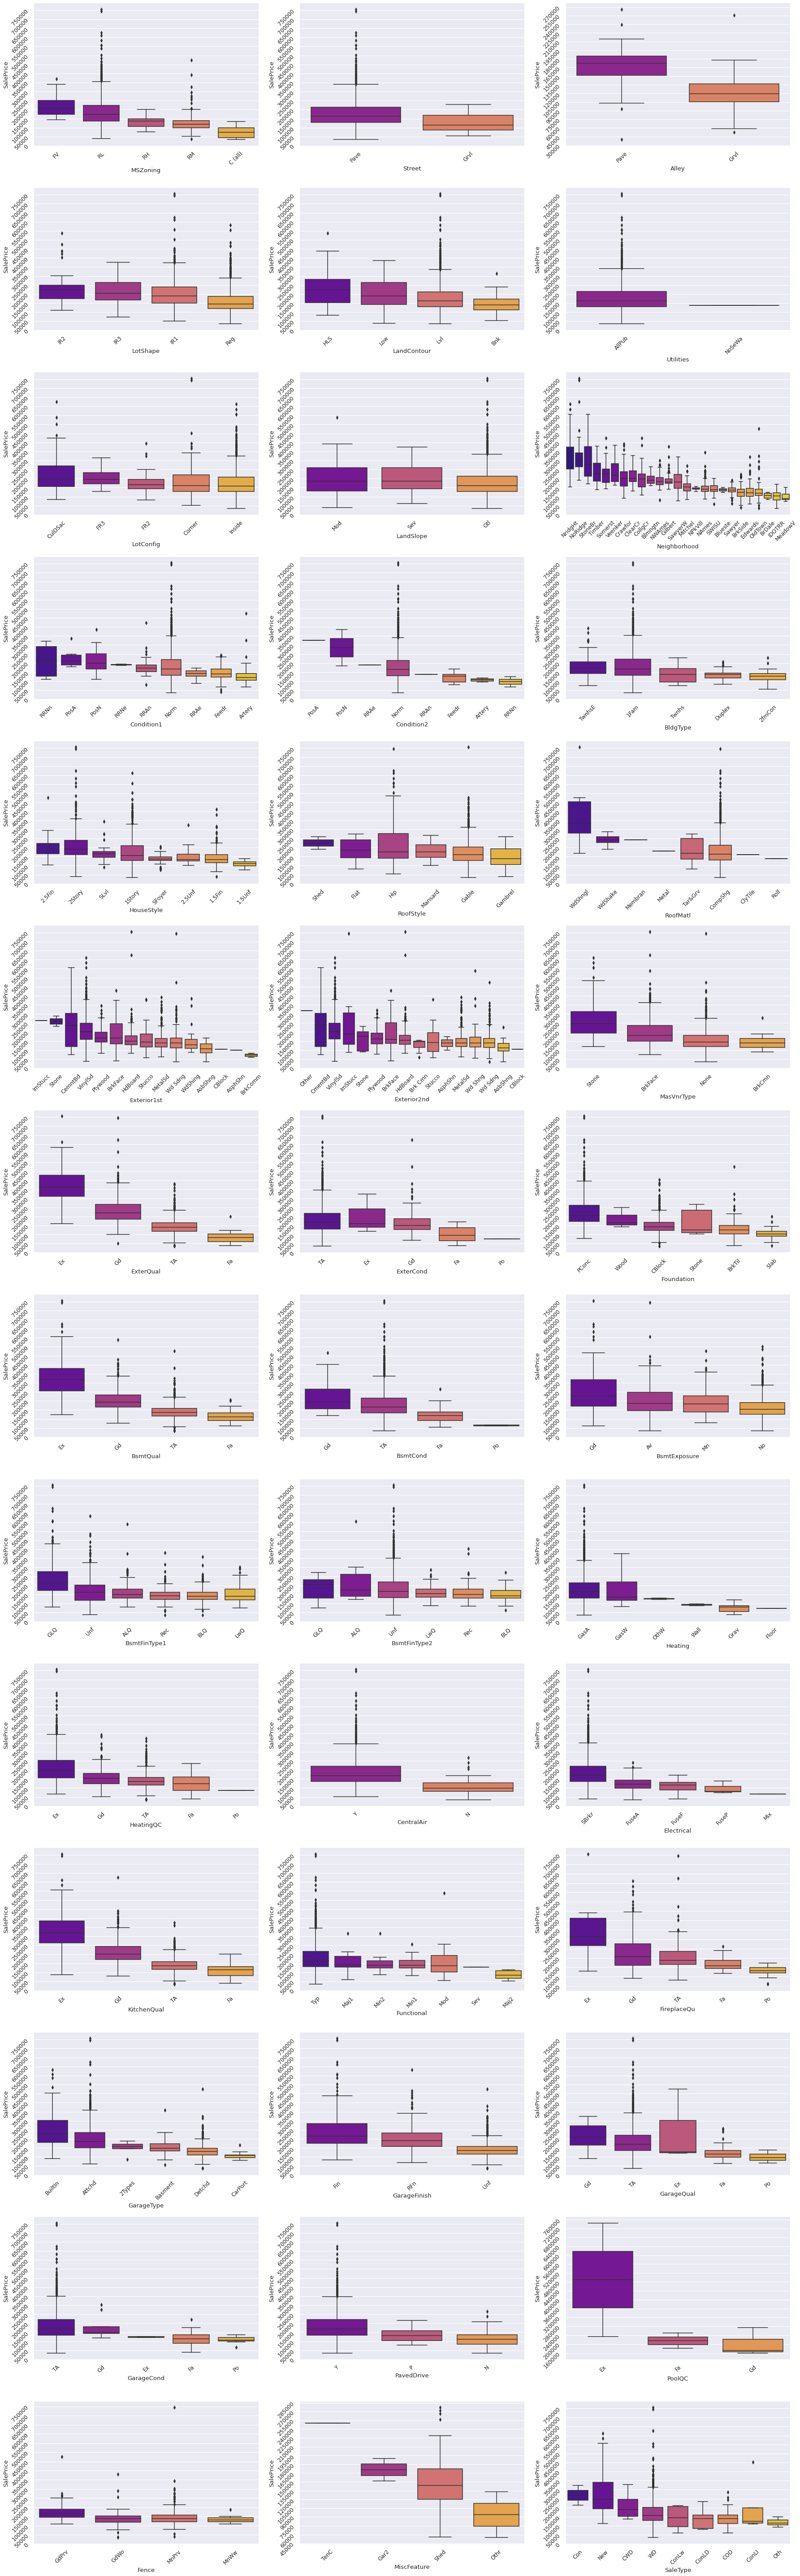

In [ ]:
# display sale price vs categorical values

srt_box('SalePrice', train)

In [ ]:
# Converting some of the categorical values to numeric ones.
# Choosing similar values for closer groups to balance linear relations...

neigh_map = {
    'MeadowV': 1,
    'IDOTRR': 1,
    'BrDale': 1,
    'BrkSide': 2,
    'OldTown': 2,
    'Edwards': 2,
    'Sawyer': 3,
    'Blueste': 3,
    'SWISU': 3,
    'NPkVill': 3,
    'NAmes': 3,
    'Mitchel': 4,
    'SawyerW': 5,
    'NWAmes': 5,
    'Gilbert': 5,
    'Blmngtn': 5,
    'CollgCr': 5,
    'ClearCr': 6,
    'Crawfor': 6,
    'Veenker': 7,
    'Somerst': 7,
    'Timber': 8,
    'StoneBr': 9,
    'NridgHt': 10,
    'NoRidge': 10
}

features['Neighborhood'] = features['Neighborhood'].map(neigh_map).astype('int')

In [ ]:
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['ExterQual'] = features['ExterQual'].map(ext_map).astype('int')
features['ExterCond'] = features['ExterCond'].map(ext_map).astype('int')

In [ ]:
bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['BsmtQual'] = features['BsmtQual'].map(bsm_map).astype('int')
features['BsmtCond'] = features['BsmtCond'].map(bsm_map).astype('int')

In [ ]:
bsmf_map = {
    'None': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}
features['BsmtFinType1'] = features['BsmtFinType1'].map(bsmf_map).astype('int')
features['BsmtFinType2'] = features['BsmtFinType2'].map(bsmf_map).astype('int')

In [ ]:
heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
features['HeatingQC'] = features['HeatingQC'].map(heat_map).astype('int')
features['KitchenQual'] = features['KitchenQual'].map(heat_map).astype('int')

In [ ]:
features['FireplaceQu'] = features['FireplaceQu'].map(bsm_map).astype('int')
features['GarageCond'] = features['GarageCond'].map(bsm_map).astype('int')
features['GarageQual'] = features['GarageQual'].map(bsm_map).astype('int')

##Numeric Data
There are many numeric features the inspect, one of the best ways to see how they effect sale prices is scatter plots. We're also plotting polynomial regression lines to see general trend. With this way we can understand the numerical values and their importance on sale price, also it's really helpful to spot outliers.

###**Observations**:

**OverallQual**; It's clearly visible that sale price of the house increases with overall quality. This confirms the correlation in first table we did at the beginning. (Pearson corr was 0.8)

**OverallCondition**; Looks like overall condition is left skewed where most of the houses are around 5/10 condition. But it doesn't effect the price like quality indicator...

**YearBuilt**; Again new buildings are generally expensive than the old ones.

**Basement**; General table shows bigger basements are increasing the price but I see some outliers there...

**GrLivArea**; This feature is pretty linear but we can spot two outliers effecting this trend. There are some huge area houses with pretty cheap prices, there might be some reason behind it but we better drop them.

**SaleDates**; They seem pretty unimportant on sale prices, we can drop them...

In [ ]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def srt_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

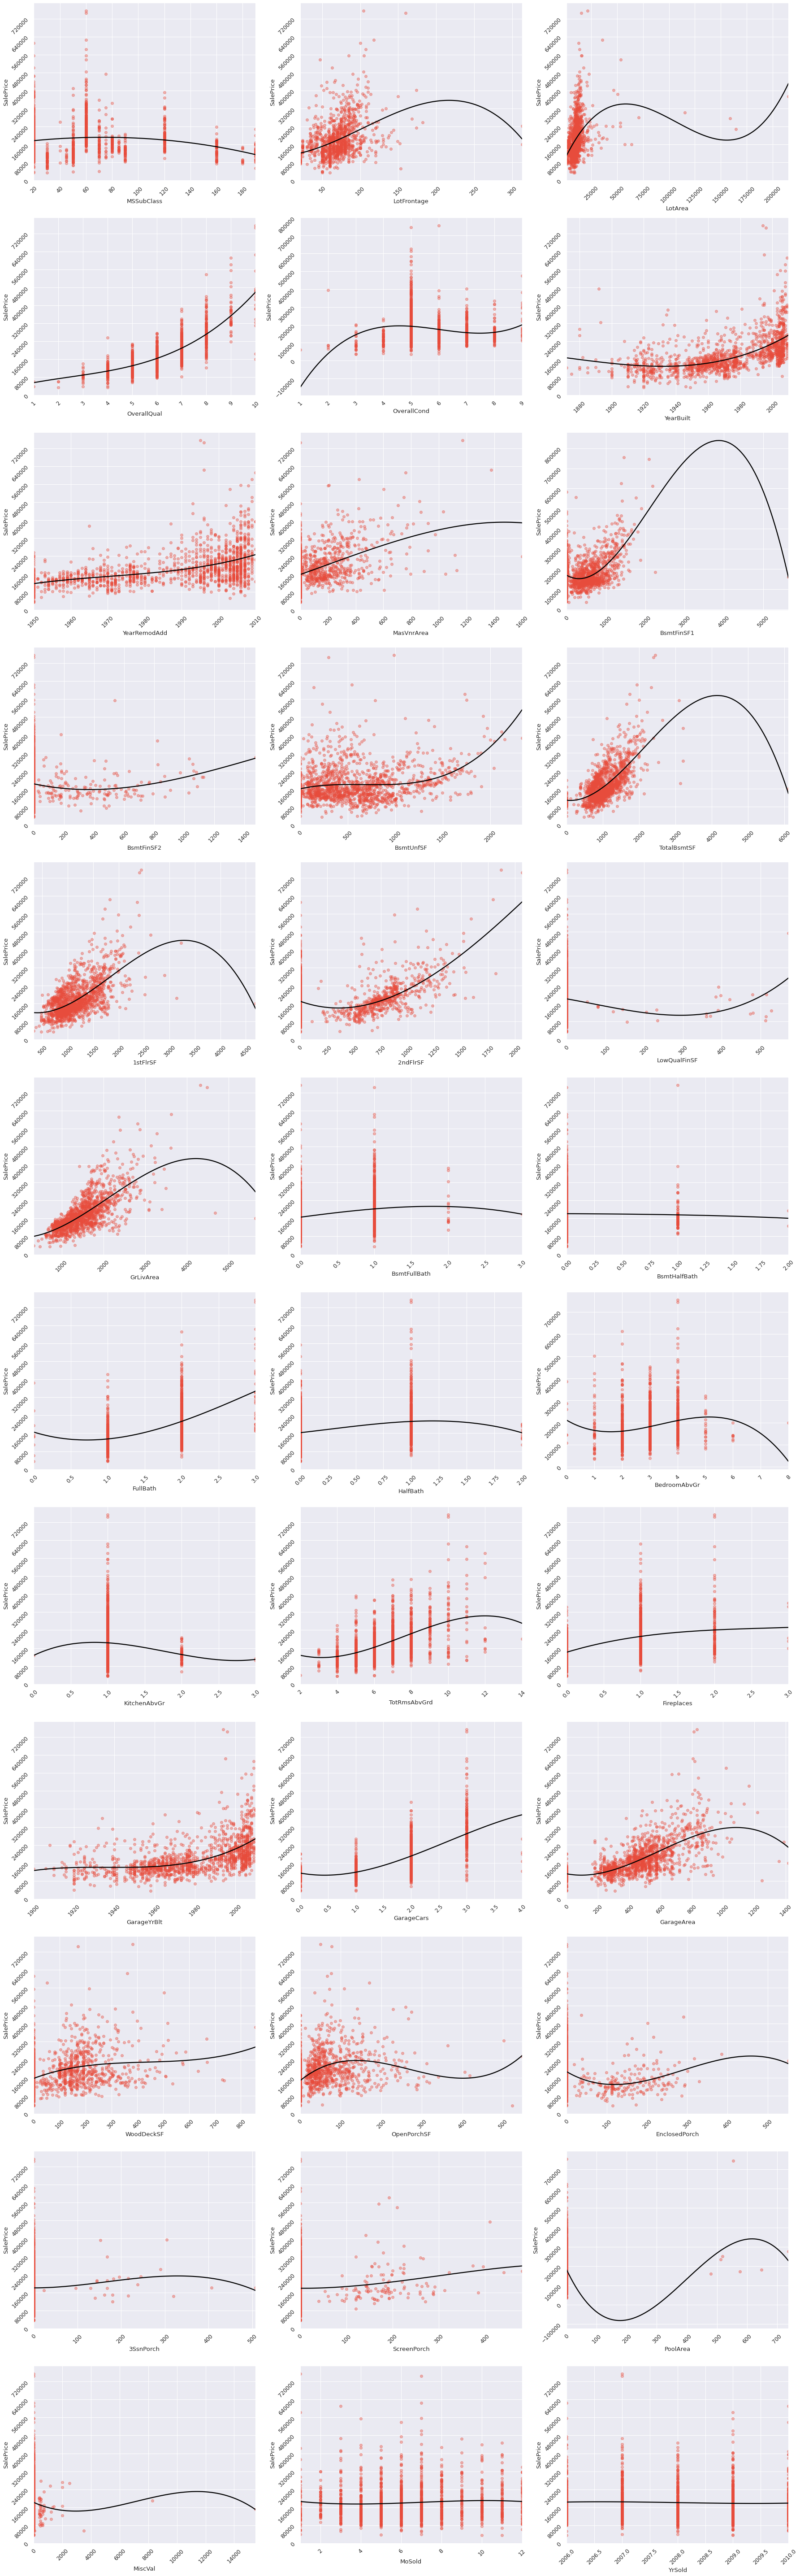

In [ ]:
srt_reg('SalePrice', train)

In [ ]:
features = features.join(y)
features.drop(features[(features['OverallQual'] < 5)
                                  & (features['SalePrice'] > 200000)].index)
features = features.drop(features[(features['GrLivArea'] > 4000)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['GarageArea'] > 1200)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['TotalBsmtSF'] > 3000)
                                  & (features['SalePrice'] > 320000)].index)
features = features.drop(features[(features['1stFlrSF'] < 3000)
                                  & (features['SalePrice'] > 600000)].index)
features = features.drop(features[(features['1stFlrSF'] > 3000)
                                  & (features['SalePrice'] < 200000)].index)

y = features.SalePrice
y.dropna(inplace=True)
features.drop(columns='SalePrice', inplace=True)

##Creating New Features
Ok in this part we going to create some features, these can improve our modelling. I went with basic approach by merging some important indicators and making them stronger.

In [ ]:
# Creating new features  based on previous observations. 
#There might be some highly correlated features now. You can drop them if you want to...

features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                            features['EnclosedPorch'] +
                            features['ScreenPorch'] + features['WoodDeckSF'])

features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

# Merging quality and conditions.

features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] +
                            features['BsmtFinType2'])

features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])

features['TotalQual'] = features['OverallQual'] + features[
    'TotalExtQual'] + features['TotalBsmQual'] + features[
        'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

# Creating new features by using new quality indicators.

features['QualGr'] = features['TotalQual'] * features['GrLivArea']
features['QualBsm'] = features['TotalBsmQual'] * (features['BsmtFinSF1'] +
                                                  features['BsmtFinSF2'])
features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
features['QlLivArea'] = (features['GrLivArea'] -
                         features['LowQualFinSF']) * (features['TotalQual'])
features['QualSFNg'] = features['QualGr'] * features['Neighborhood']

In [ ]:
# Observing the effects of newly created features on sale price.

def srt_reg(feature):
    merged = features.join(y)
    fig, axes = plt.subplots(5, 3, figsize=(25, 40))
    axes = axes.flatten()

    new_features = [
        'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm',
        'TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual', 'QualGr',
        'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea', 'QualSFNg'
    ]

    for i, j in zip(new_features, axes):

        sns.regplot(x=i,
                    y=feature,
                    data=merged,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

##Checking New Features
Well... They look decent enough, I hope these can help us building strong models. I also wanted to add some more basic features for having specific feature or not. This approach was widely accepted by community so I see no harm to add them.

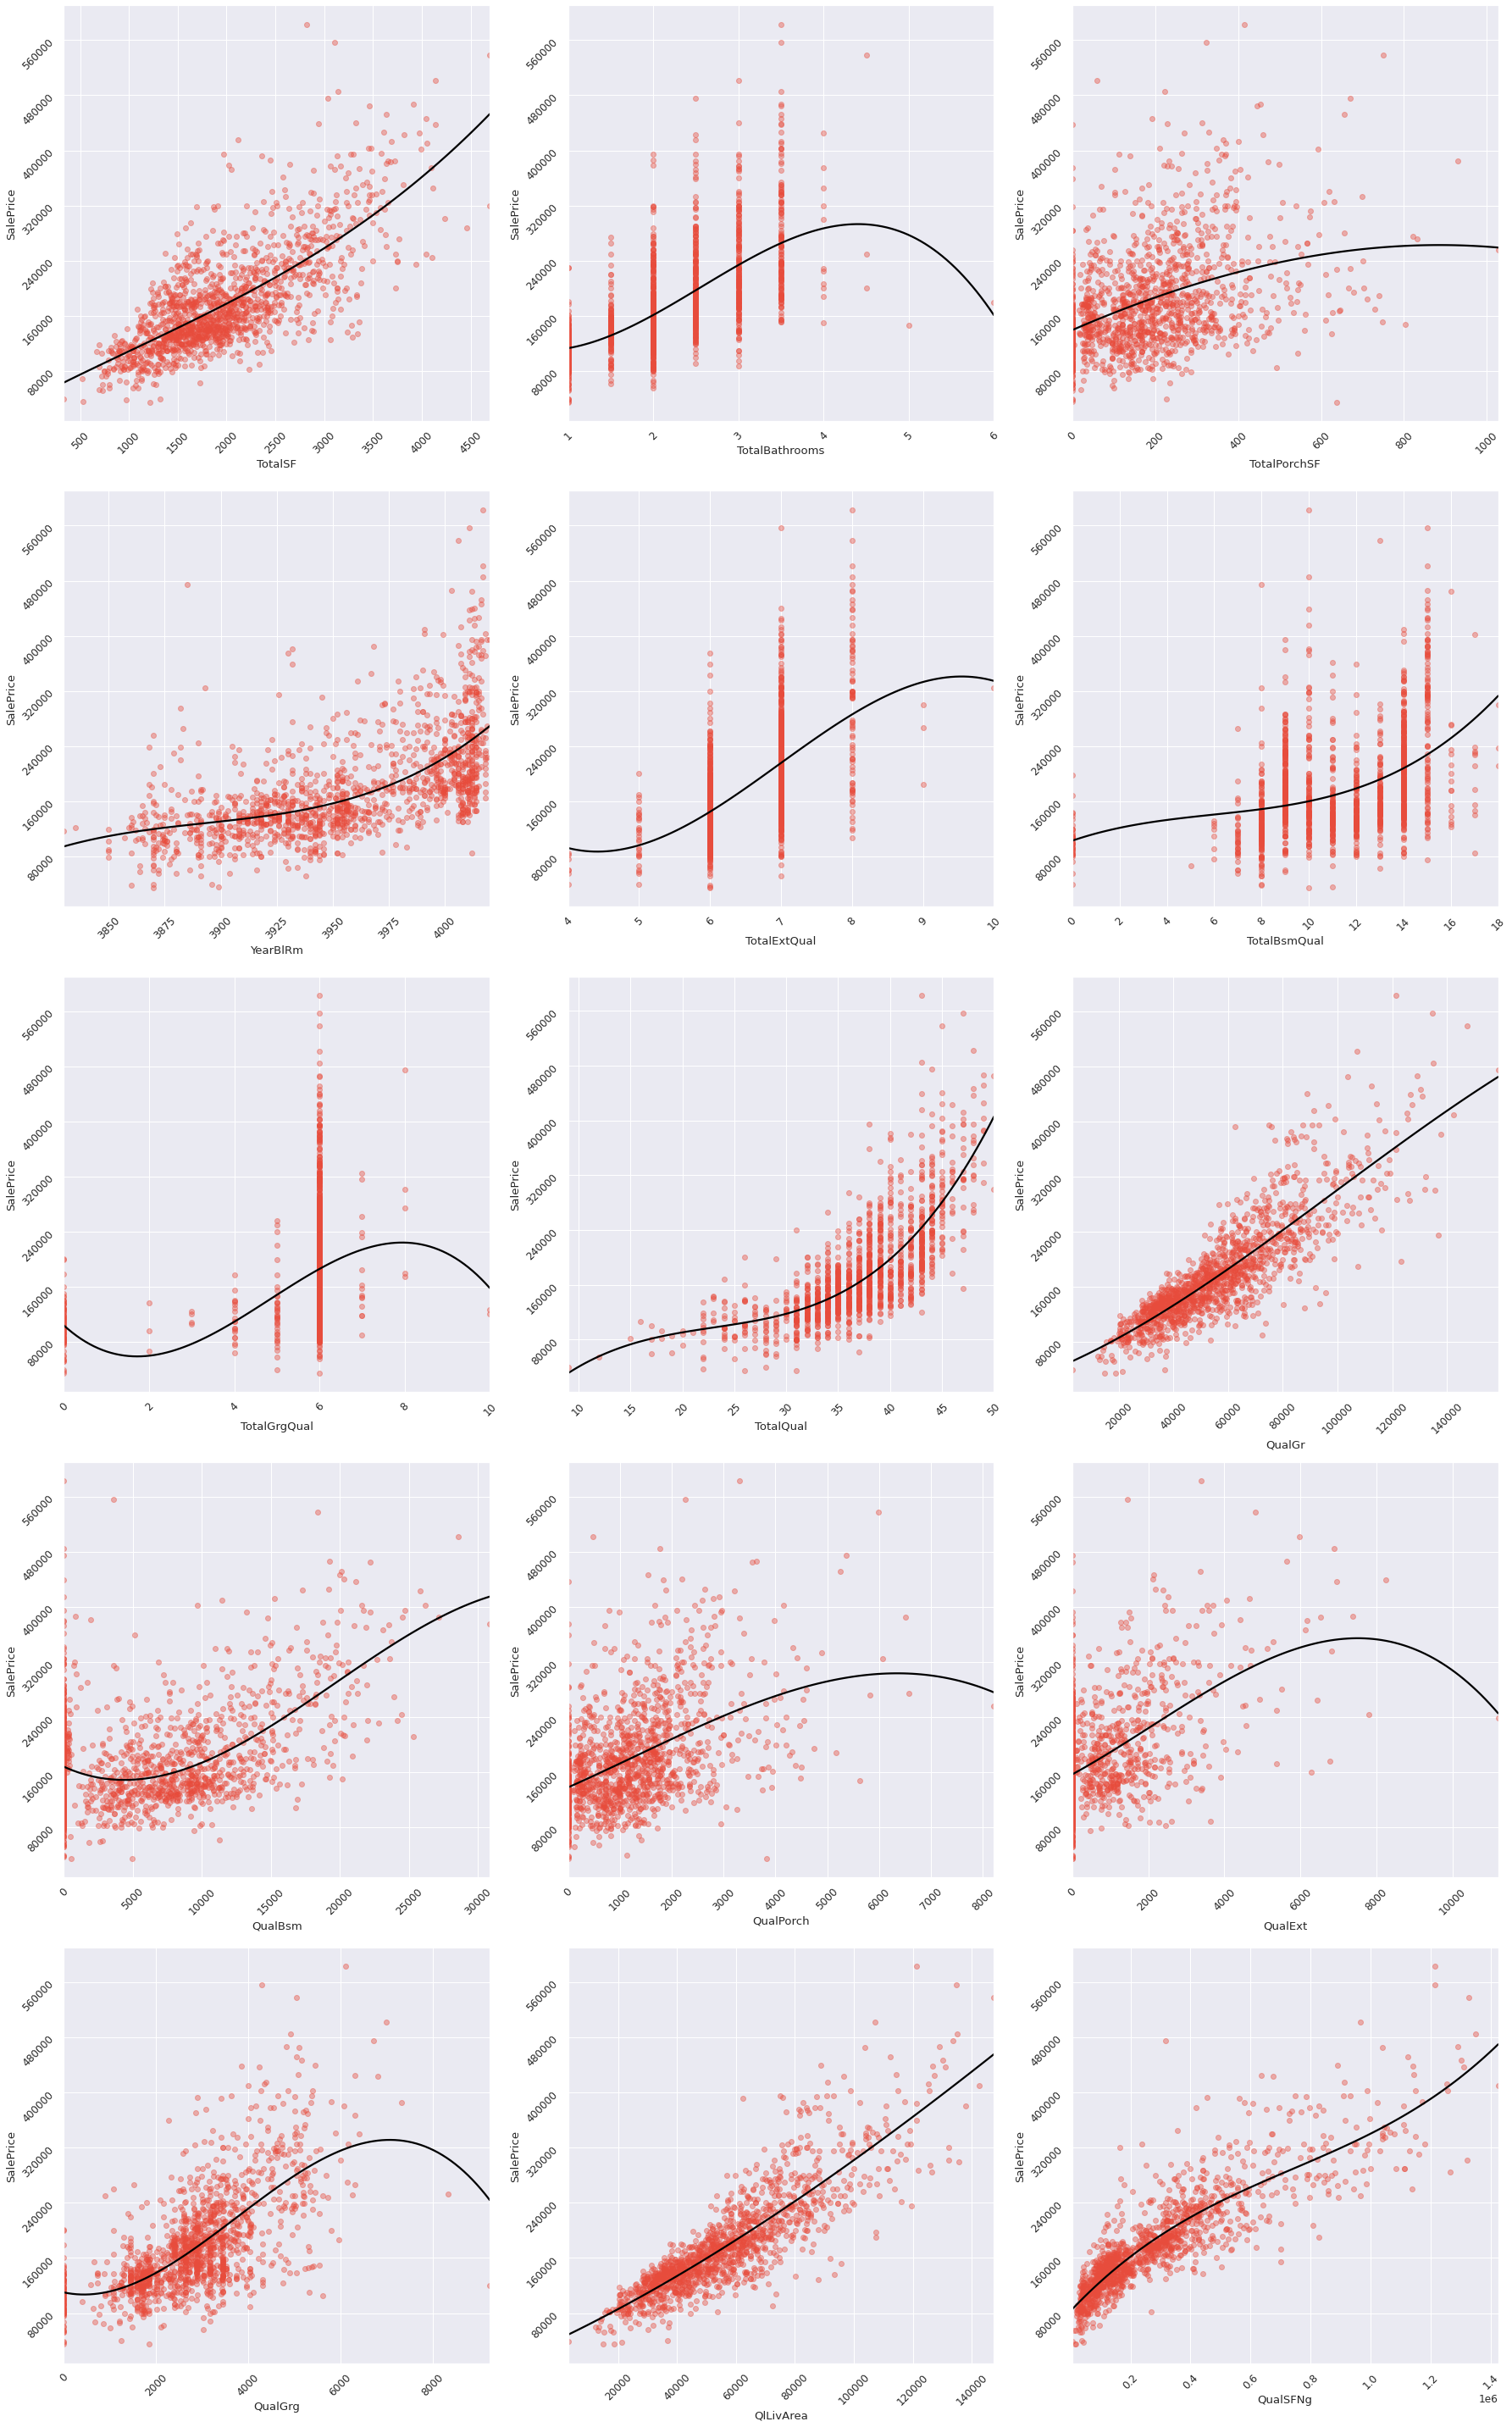

In [ ]:
srt_reg('SalePrice')

In [ ]:
# Creating some simple features.

features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1
                                                     if x > 0 else 0)
features['HasGarage'] = features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1
                                                        if x > 0 else 0)
features['HasPorch'] = features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

##Transforming the Data
Some of the continious values are not distributed evenly and not fitting on normal distribution, we can fix them by using couple transformation approaches. We're going to use boxcox here, again it's widely used by community and I want to thank them all for their great work.

We're going to list skewed features and then apply boxcox transformation with boxcox_normmax (It computes optimal boxcox transform parameter for input data, so we don't decide the lambda here)...

In [ ]:
# Numerical features we worked on which seems highly skewed but we filter again anyways...

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

In [ ]:
# Finding skewness of the numerical features.

skew_features = np.abs(features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed features.

high_skew = skew_features[skew_features > 0.3]

# Taking indexes of high skew.

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness.

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))


Here we dropping some unnecessary features had their use in feature engineering or not needed at all. Obviously it's subjective but I feel they don't add much to model. Then we one hot encode the categorical data left so everything will be prepared for the modelling.

In [ ]:
# Features to drop:

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]

# Dropping features.

features.drop(columns=to_drop, inplace=True)

In [ ]:
# Getting dummy variables for categorical data.

features = pd.get_dummies(data=features)

##Double Check
Before we move to modelling I want to take one last look to the data we processed. Everyting seems in order, not missing datas, values are numerical etc. Our feature engineered data is present...

Just want to check how transformed data correlates with sale prices before we move on and it looks decent.

Again I wanted to check our target value distribution and it seems little skewed. We can fix this by applying log transformation so our models can perform better.

In [ ]:
# call .sum() twice so we can get total number of missing vals 
# for all columns
features.isna().sum().sum()

0

In [ ]:
print(f'Number of missing values: {features.isna().sum().sum()}')


Number of missing values: 0


In [ ]:
features.shape


(2909, 226)

In [ ]:
features.sample(5)


LotFrontage    LotArea  Neighborhood  OverallQual  OverallCond  \
725     16.250247  13.443546             3            4            6   
2585    13.407931  14.828100             4            7            5   
310     16.082960  13.661820             5            6            5   
229     13.216680  11.785474             5            7            5   
2242    12.828402  11.425633             1            5            7   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterCond  BsmtCond  BsmtFinType1  \
725        1970          1970    0.000000          3         3             5   
2585       2002          2002    0.000000          3         3             6   
310        1993          1994   15.141713          3         3             5   
229        2005          2006    5.481256          3         3             6   
2242       1976          1976    0.000000          3         3             5   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
725    93.530540             4    8.951997   40.987350   465.822515  6.281270   
2585  239.225991             1    0.000000    7.511385   720.872215  6.699740   
310   117.949799             1    0.000000   33.481697   384.510205  6.096122   
229     9.122653             1    0.000000  112.231044   704.407720  6.783577   
2242   83.069086             1    0.000000   39.179369   311.176304  6.339904   

         2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
725      0.000000           0.0   8.432497           0.0           0.0   
2585     0.000000           0.0   9.192429           1.0           0.0   
310   1101.688624           0.0   9.292456           0.0           0.0   
229      0.000000           0.0   9.348525           0.0           0.0   
2242   738.194366           0.0   9.264783           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
725          1         0             3             1             5   
2585         1         1             1             1             4   
310          2         1             3             1             6   
229          2         0             2             1             7   
2242         2         0             4             1             6   

      Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
725            0            0       1989.0         2.0       660.0   
2585           1            4       2002.0         2.0       576.0   
310            1            3       1993.0         2.0       420.0   
229            1            3       2005.0         2.0       430.0   
2242           1            3       1976.0         1.0       336.0   

      GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
725            3   26.752837     0.000000            0.0        0.0   
2585           3    0.000000    18.722397            0.0        0.0   
310            3   41.844000    12.260167            0.0        0.0   
229            3   34.763456     6.538910            0.0        0.0   
2242           3   26.010790     7.590326            0.0        0.0   

      ScreenPorch  PoolArea   MiscVal  TotalSF  TotalBathrooms  TotalPorchSF  \
725      0.000000       0.0  6.535585   1478.0             1.0            96   
2585    21.004682       0.0  0.000000   2801.0             2.5           289   
310      0.000000       0.0  0.000000   2019.0             2.5           253   
229      0.000000       0.0  0.000000   1571.0             2.0           163   
2242     0.000000       0.0  0.000000   1793.0             2.0           118   

      YearBlRm  TotalExtQual  TotalBsmQual  TotalGrgQual  TotalQual  QualGr  \
725       3940             6            15             6         38   32832   
2585      4004             7            14             6         43   60587   
310       3987             6            13             6         39   58539   
229       4011             7            14             6         43   66865   
2242      3952 

In [ ]:
features.describe()


LotFrontage      LotArea  Neighborhood  OverallQual  OverallCond  \
count  2909.000000  2909.000000   2909.000000  2909.000000  2909.000000   
mean     17.458851    14.008907      4.456171     6.081128     5.566861   
std       3.351385     1.126143      2.457175     1.397932     1.113912   
min       8.365333    10.025568      1.000000     1.000000     1.000000   
25%      16.082960    13.593204      3.000000     5.000000     5.000000   
50%      17.547853    14.119648      4.000000     6.000000     5.000000   
75%      19.377077    14.572177      5.000000     7.000000     6.000000   
max      43.651522    22.242242     10.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea    ExterCond     BsmtCond  \
count  2909.000000   2909.000000  2909.000000  2909.000000  2909.000000   
mean   1971.246820   1984.231351     8.177985     3.085253     2.918185   
std      30.292798     20.896675    11.172450     0.372202     0.575917   
min    1872.000000   1950.000000     0.000000     1.000000     0.000000   
25%    1953.000000   1965.000000     0.000000     3.000000     3.000000   
50%    1973.000000   1993.000000     0.000000     3.000000     3.000000   
75%    2001.000000   2004.000000    18.082121     3.000000     3.000000   
max    2010.000000   2010.000000    51.482423     5.000000     4.000000   

       BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  \
count   2909.000000  2909.000000   2909.000000  2909.000000  2909.000000   
mean       3.535579    89.565396      1.273290     1.158141    60.254431   
std        2.113002    79.264523      0.954201     3.240512    32.811949   
min        0.000000     0.000000      0.000000     0.000000     0.000000   
25%        1.000000     0.000000      1.000000     0.000000    37.941403   
50%        4.000000    92.271932      1.000000     0.000000    59.625578   
75%        6.000000   151.113193      1.000000     0.000000    82.301782   
max        6.000000   508.551406      6.000000    14.348779   154.509082   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2909.000000  2909.000000  2909.000000   2909.000000  2909.000000   
mean    547.434938     6.485488   459.652248      0.062714     9.209654   
std     201.853041     0.273502   589.686325      0.534075     0.507032   
min       0.000000     5.455826     0.000000      0.000000     7.022335   
25%     430.995213     6.293132     0.000000      0.000000     8.839711   
50%     525.085977     6.473535     0.000000      0.000000     9.228994   
75%     670.415853     6.683883   957.692267      0.000000     9.527689   
max    2269.974178     7.778810  2671.458600      5.404851    11.306105   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2909.000000   2909.000000  2909.000000  2909.000000   2909.000000   
mean       0.427982      0.061189     1.565486     0.379512      2.859402   
std        0.523900      0.245390     0.550345     0.502750      0.822545   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  FireplaceQu  GarageYrBlt  \
count   2909.000000   2909.000000  2909.000000  2909.000000  2909.000000   
mean       1.044689      6.440358     0.594019     1.762461  1869.926091   
std        0.214815      1.557131     0.643328     1.805621   450.396255   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     0.000000  1957.000000   
50%        1.000000      6.000000     1.000000     1.000000  1977.000000   
75%        1.000000      7.000000     1.000000     4.000000  2001.00

In [ ]:
len(y), len(train)

(1450, 1460)

In [ ]:
# Separating train and test set.

train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

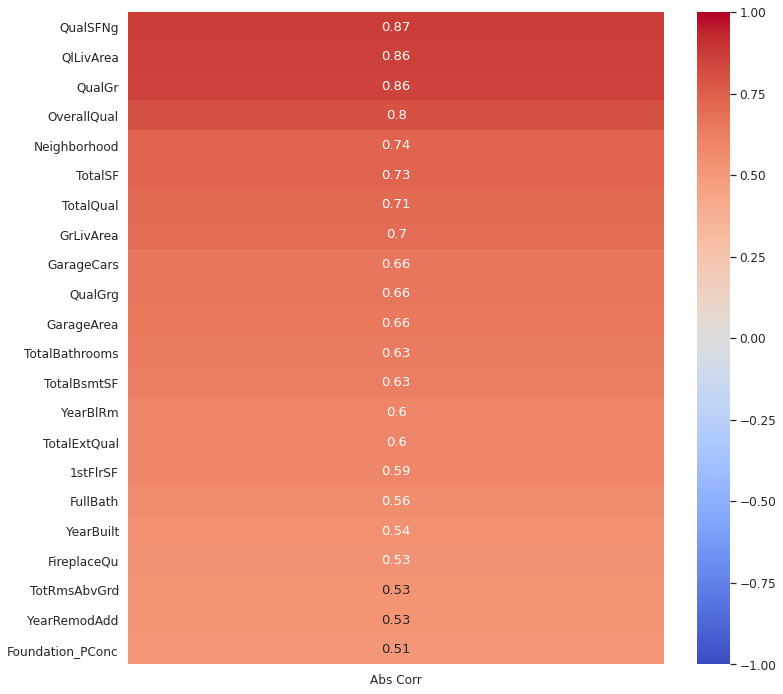

In [ ]:
correlations = train.join(y).corrwith(train.join(y)['SalePrice']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.5], cmap='coolwarm', annot=True, 
            vmin=-1, vmax=1, ax=ax);

In [ ]:
def plot_dist3(df, feature, title):
    
    # Creating a customized chart. and giving in figsize and everything.
    
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    
    # creating a grid of 3 cols and 3 rows.
    
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # Set the title.
    
    ax1.set_title('Histogram')
    
    # plot the histogram.
    
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 fit=norm,
                 ax=ax1,
                 color='#e74c3c')
    ax1.legend(labels=['Normal', 'Actual'])

    # customizing the QQ_plot.
    
    ax2 = fig.add_subplot(grid[1, :2])
    
    # Set the title.
    
    ax2.set_title('Probability Plot')
    
    # Plotting the QQ_Plot.
    stats.probplot(df.loc[:, feature].fillna(np.mean(df.loc[:, feature])),
                   plot=ax2)
    ax2.get_lines()[0].set_markerfacecolor('#e74c3c')
    ax2.get_lines()[0].set_markersize(12.0)

    # Customizing the Box Plot:
    
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    
    ax3.set_title('Box Plot')
    
    # Plotting the box plot.
    
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.suptitle(f'{title}', fontsize=24)

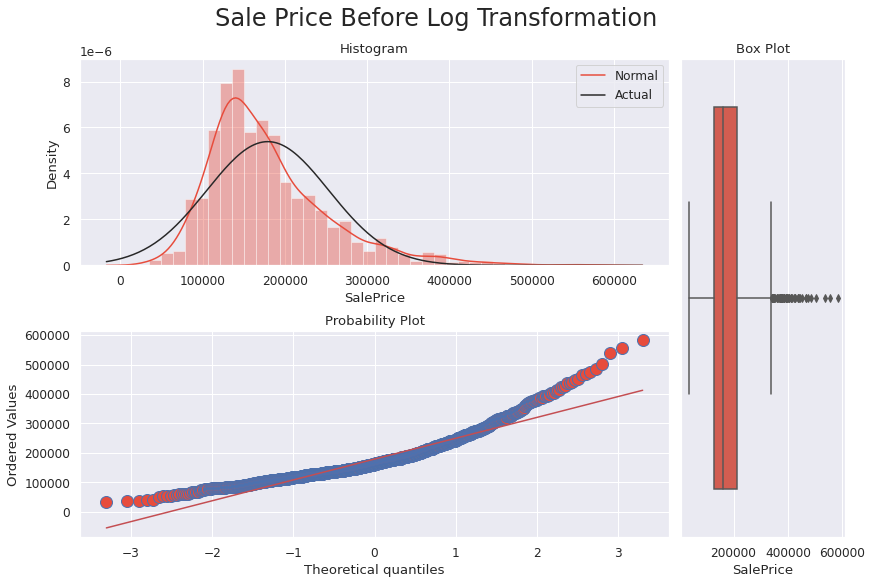

In [ ]:
# Checking target variable.

plot_dist3(train.join(y), 'SalePrice', 'Sale Price Before Log Transformation')

In [ ]:
# Setting model data.

X = train
X_test = test
y = np.log1p(y)

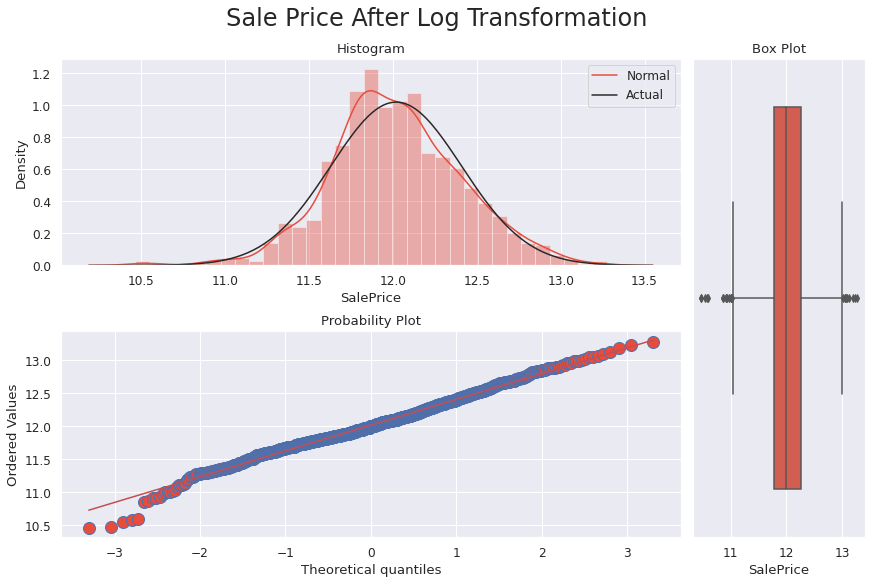

In [ ]:
plot_dist3(train.join(y), 'SalePrice', 'Sale Price After Log Transformation')

##Modelling
Well then, it's time to do some modelling! First of all I wanted to thank kaggle community for loads of examples inspired me. Especially Alex Lekov's great script and Serigne's stacked regressions approach were great guides for me!

Let's start with loading packages needed and then we set our regressors. The regressors I'm going to use here are:

Ridge,
Lasso,
Elasticnet,
Support Vector Regression

I'm going to apply robust scaler on these before we run them because they really get effected by outliers.

Gradient Boosting Regressor
LightGBM Regressor
XGBoost Regressor

These don't need scaling in my opinion so we just go as it is

Hist Gradient Boosting Regressor

This is just for experimenting, it's still experimental on sklearn anyways

Tweedie Regressor

This regressor added in latest version of sklearn and I wanted to try it. It's generalized linear model with a Tweedie distribution. We gonna use power of 0 because we expecting normal target distribution but you can try this or other generalized models like poisson regressor or gamma regressor.

I tried to tune models by using Optuna package, that part is not added here.

In [ ]:
# Loading neccesary packages for modelling.

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, TweedieRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor # This is for stacking part, works well with sklearn and others...

In [ ]:
# Setting kfold for future use.

kf = KFold(10, random_state=42, shuffle=True)

In [ ]:
# Some parameters for ridge, lasso and elasticnet.

alphas_alt = [15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [
    5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008
]
e_alphas = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv

ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=alphas_alt,
    cv=kf,
))

# lasso_cv:

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv:

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=1e7,
                 alphas=e_alphas,
                 cv=kf,
                 random_state=42,
                 l1_ratio=e_l1ratio))

# svr:

svr = make_pipeline(RobustScaler(),
                    SVR(C=21, epsilon=0.0099, gamma=0.00017, tol=0.000121))

# gradientboosting:

gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm:

lightgbm = LGBMRegressor(objective='regression',
                         n_estimators=3500,
                         num_leaves=5,
                         learning_rate=0.00721,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)

# xgboost:

xgboost = XGBRegressor(
    learning_rate=0.0139,
    n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)


# hist gradient boosting regressor:

hgrd= HistGradientBoostingRegressor(    loss= 'least_squares',
    max_depth= 2,
    min_samples_leaf= 40,
    max_leaf_nodes= 29,
    learning_rate= 0.15,
    max_iter= 225,
                                    random_state=42)

# tweedie regressor:
 
tweed = make_pipeline(RobustScaler(),TweedieRegressor(alpha=0.005))


# stacking regressor:

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgboost, lightgbm,hgrd, tweed),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

##Cross Validation


In [ ]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [ ]:
# Setting list of estimators and labels for them:

estimators = [ridge, lasso, elasticnet, gbr, xgboost, lightgbm, svr, hgrd, tweed]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor',
    'XGBRegressor', 'LGBMRegressor', 'SVR', 'HistGradientBoostingRegressor','TweedieRegressor'
]

##Model Results
Allright, our results are here. Looks like our models did pretty close to each other, there might be some overfitting models and we can try to fix them by tuning but it was computationally expensive for me and since I'm going to stack and blend the models I think we can leave them as it is. We already added our models to stacking regression and set the XGBoost as meta regressor we can continue with stacking

In [ ]:
# Executing cross validation.

raw_models = model_check(X, y, estimators, kf)
display(raw_models.style.background_gradient(cmap='summer_r'))

##Stacking & Blending
Here we fit every single estimator we have on the train data and then blend them by assigning weights to each model and sum the results. Weights are pretty subjective and I'm pretty sure you can come up with something performs better than this if you play with it...

In [ ]:
# Fitting the models on train data.

print('=' * 20, 'START Fitting', '=' * 20)
print('=' * 55)

print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(X.values, y.values)
print(datetime.now(), 'Elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'Lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'Ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'SVR')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'XGboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'Lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)
print(datetime.now(), 'Hist')
hist_full_data = hgrd.fit(X, y)
print(datetime.now(), 'Tweed')
tweed_full_data = tweed.fit(X, y)
print('=' * 20, 'FINISHED Fitting', '=' * 20)
print('=' * 58)

==================== START Fitting ====================
2021-08-01 07:38:23.475935 StackingCVRegressor
[07:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2021-08-

In [ ]:
# Blending models by assigning weights:

def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.1 * lasso_model_full_data.predict(X)) +
            (0.1 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) +
            (0.05 * gbr_model_full_data.predict(X)) +
            (0.1 * xgb_model_full_data.predict(X)) +
            (0.05 * lgb_model_full_data.predict(X)) +
            (0.05 * hist_full_data.predict(X)) +
            (0.1 * tweed_full_data.predict(X)) +
            (0.25 * stack_gen_model.predict(X.values)))

##Submission
Our models are tuned, stacked, fitted and blended so we are ready to predict and submit our results. One last thing that I have seen on couple examples adding weights on some quantile levels. It didn't increase my results a lot but still improved the end results a little so I decided to use it.

In [ ]:
X_test.head()

LotFrontage    LotArea  Neighborhood  OverallQual  OverallCond  \
1460    19.377077  14.593996             3            5            6   
1461    19.523992  15.068963             3            6            6   
1462    18.478429  14.996345             5            5            5   
1463    19.080856  14.246282             5            6            6   
1464    13.216680  12.730896             9            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  ExterCond  BsmtCond  BsmtFinType1  \
1460       1961          1961    0.000000          3         3             3   
1461       1958          1958   14.876370          3         3             5   
1462       1997          1998    0.000000          3         3             6   
1463       1998          1998    6.215979          3         3             6   
1464       1992          1992    0.000000          3         3             5   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1460  109.664752             2    7.748307  42.933653   474.479432  6.312537   
1461  178.375495             1    0.000000  54.842327   684.220897  6.649952   
1462  159.733246             1    0.000000  28.443825   496.517091  6.342685   
1463  131.367477             1    0.000000  47.908244   495.561426  6.340832   
1464   72.445812             1    0.000000  94.656035   661.654882  6.617922   

        2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1460    0.000000           0.0   8.488193           0.0           0.0   
1461    0.000000           0.0   9.100348           0.0           0.0   
1462  953.388974           0.0   9.422469           0.0           0.0   
1463  920.430989           0.0   9.397846           0.0           0.0   
1464    0.000000           0.0   9.041350           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
1460         1         0             2             1             5   
1461         1         1             3             1             6   
1462         2         1             3             1             6   
1463         2         1             3             1             7   
1464         2         0             2             1             5   

      Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
1460           0            0       1961.0         1.0       730.0   
1461           0            0       1958.0         1.0       312.0   
1462           1            3       1997.0         2.0       482.0   
1463           1            4       1998.0         2.0       470.0   
1464           0            0       1992.0         2.0       506.0   

      GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1460           3   34.284455     0.000000            0.0        0.0   
1461           3   66.950770     9.088688            0.0        0.0   
1462           3   44.932043     8.808719            0.0        0.0   
1463           3   63.275646     9.088688            0.0        0.0   
1464           3    0.000000    14.062050            0.0        0.0   

      ScreenPorch  PoolArea    MiscVal  TotalSF  TotalBathrooms  TotalPorchSF  \
1460    18.999014       0.0   0.000000   1508.0             1.0           260   
1461     0.000000       0.0  10.181041   2252.0             1.5           429   
1462     0.000000       0.0   0.000000   2420.0             2.5           246   
1463     0.000000       0.0   0.000000   2206.0             2.5           396   
1464    20.928027       0.0   0.000000   1543.0             2.0           226   

      YearBlRm  TotalExtQual  TotalBsmQual  TotalGrgQual  TotalQual  QualGr  \
1460      3922             6            11             6         34   30464   
1461      3916             6            12             6         37   49173   
1462      3995             6            14             6         38   61902   
1463      3996             6            13             6         40   64160   
1464      3984       

In [ ]:
submission = pd.read_csv('/content/housing_ames_test.csv')
# Inversing and flooring log scaled sale price predictions
submission['SalePrice'] = np.floor(np.expm1(blend_models_predict(X_test)))
# Defining outlier quartile ranges
q1 = submission['SalePrice'].quantile(0.0050)
q2 = submission['SalePrice'].quantile(0.99)

# Applying weights to outlier ranges to smooth them
submission['SalePrice'] = submission['SalePrice'].apply(
    lambda x: x if x > q1 else x * 0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x
                                                        if x < q2 else x * 1.1)
submission = submission[['Id', 'SalePrice']]

In [ ]:
# Saving submission file

submission.to_csv('mysubmission.csv', index=False)
print(
    'Save submission',
    datetime.now(),
)
submission.head()

Save submission 2021-08-01 07:44:07.787278


Id  SalePrice
0  1461   118636.0
1  1462   159002.0
2  1463   188384.0
3  1464   197558.0
4  1465   188275.0